This is the data and the neural network representation
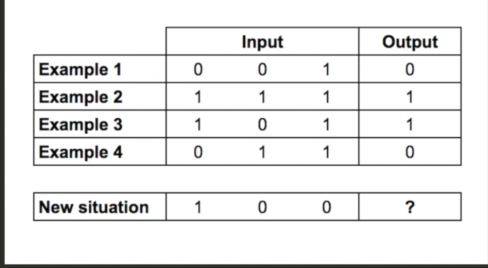

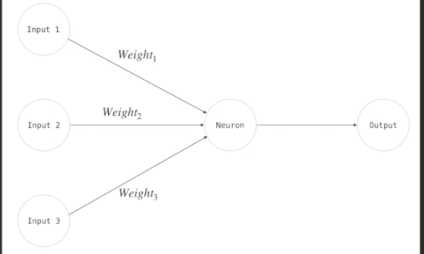

In [4]:
import math
import random

class NeuralNetwork():
	def __init__(self):
		random.seed(1)
		self.weights = [random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]

	# Make a prediction
	def calculate_neuron_output(self, neuron_inputs):
		sum_of_weighted_inputs = self.__sum_of_weighted_inputs(neuron_inputs)
		neuron_output = self.__sigmoid(sum_of_weighted_inputs)
		return neuron_output


	def train(self, training_set_examples, number_of_iterations):
		for iteration in range(number_of_iterations):
			for training_set_example in training_set_examples:

				predicted_output = self.calculate_neuron_output(training_set_example["inputs"])
				error_in_output = training_set_example["output"] - predicted_output

				# Iterate through the weights and adjust each one
				for index in range(len(self.weights)):

					neuron_input = training_set_example["inputs"][index]


					adjusted_weight = neuron_input * error_in_output * self.__sigmoid_gradient(predicted_output)

					# Adjust the weight
					self.weights[index] += adjusted_weight


	# Calculate the sigmoid (our activation function)
	def __sigmoid(self, sum_of_weighted_inputs):
		return 1 / (1 + math.exp(-sum_of_weighted_inputs))

	# Calculate the gradient of the sigmoid using its own output
	def __sigmoid_gradient(self, neuron_output):
		return neuron_output * (1 - neuron_output)

	# Multiply each input by its own weight, and then sum the total
	def __sum_of_weighted_inputs(self, neuron_inputs):
		sum_of_weighted_inputs = 0
		for index, neuron_input in enumerate(neuron_inputs):
			sum_of_weighted_inputs += self.weights[index] * neuron_input
		return sum_of_weighted_inputs


In [2]:
neural_network = NeuralNetwork()

print("Random starting weights: " + str(neural_network.weights))

# The neural network will use this training set of 4 examples, to learn the pattern
training_set_examples = [{"inputs": [0, 0, 1], "output": 0},
{"inputs": [1, 1, 1], "output": 1},
{"inputs": [1, 0, 1], "output": 1},
{"inputs": [0, 1, 1], "output": 0}]

# Train the neural network using 10,000 iterations
neural_network.train(training_set_examples, number_of_iterations=10000)

print("New weights after training: " + str(neural_network.weights))

Random starting weights: [-0.7312715117751976, 0.6948674738744653, 0.5275492379532281]
New weights after training: [9.672881904304742, -0.20818131327443068, -4.629370228924396]


In [3]:
# Making a prediction for a new situation
new_situation = [1, 0, 0]
prediction = neural_network.calculate_neuron_output(new_situation)

print("Prediction for the new situation [1,0,0] -> ? " + str(prediction))

Prediction for the new situation [1,0,0] -> ? 0.9999370358392512
